<a href="https://colab.research.google.com/github/AsthmaticDonkey/Thesis/blob/master/MatchImage3_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
pip install image-match

  Using cached https://files.pythonhosted.org/packages/86/d0/b0192dc9a544da90f2d9150bcd84b981c6873e42a1f752b6affb89180ad8/scikit-image-0.12.3.tar.gz
  Using cached https://files.pythonhosted.org/packages/c3/db/3869181ba938814d092a53ffbe2597be8597f0a4be62fc3989a82b0fa85a/elasticsearch-2.3.0-py2.py3-none-any.whl
  Created wheel for scikit-image: filename=scikit_image-0.12.3-cp36-cp36m-linux_x86_64.whl size=26738736 sha256=37057a417e8cf69d93b47f790d9976f4a8fa780c9031c3d1c3acbb3922c8b166
  Stored in directory: /root/.cache/pip/wheels/bc/98/ff/364a64db93b1909ecc2d1e75035ec56f27b5f53b4b31527fe1
Successfully built scikit-image
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scikit-image 0.15.0
    Uninstalling scikit-image-0.15.0:
      Successfully uninstalled scikit-image-0.15.0


In [0]:
pip install pydicom

In [0]:
from google.colab import drive
drive.mount('/content/drive')
from fastai import *
from fastai.vision import *
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
from image_match.goldberg import ImageSignature
import image_match
import cv2
import nibabel as nib
import numpy as np
from matplotlib import pyplot as plt, cm
from __future__ import division
import pydicom as DCM

In [0]:
path = Path('/content/drive/My Drive/ThesisData')

dest = path
dest.mkdir(parents=True, exist_ok=True)

dicom_image_file_0 = DCM.read_file('/content/drive/My Drive/ThesisData/Body1.dcm')

In [0]:
img = dicom_image_file_0.pixel_array[350]

In [0]:
inti = 0
mlist = [] 
direction = 0

gis = ImageSignature()
a = gis.generate_signature(img)
directory = '/content/drive/My Drive/ThesisData/'

for inum in range(0, dicom_image_file_0.pixel_array.shape[0]):
  b = gis.generate_signature(dicom_image_file_0.pixel_array[inum])
  mlist.append([gis.normalized_distance(a, b),inum,direction])
  if(gis.normalized_distance(a, b) == 0):
    print('found')
    break;



In [0]:
tformIm = []
tformArr = []

length1 = dicom_image_file_0.pixel_array.shape[0]
length2 = dicom_image_file_0.pixel_array.shape[1]
length3 = dicom_image_file_0.pixel_array.shape[2]



for inti2 in range(0,length2):
  for inti1 in range(0,length1):
    tformIm.append(dicom_image_file_0.pixel_array[inti1][inti2])
  tformArr.append(tformIm)
  tformIm = []


In [0]:
inti = 0
direction = 1
for img1 in tformIm:
  b = gis.generate_signature(tformIm[inti])
  mlist.append([gis.normalized_distance(a, b),inti,direction])
  if(gis.normalized_distance(a, b) == 0):
    print('found')
  inti = inti+1


numMatch = 100
ind = 1
direc = 5

for i in mlist:
  if(i[0] < numMatch):
    numMatch = i[0]
    ind = i[1]
    direc = i[2]

In [0]:
print(ind)
print(numMatch)
if(numMatch>0.5):
  direc = 5;
print(direc)



if(direc == 0):
  imgplot = plt.imshow(dicom_image_file_0.pixel_array[ind])
elif(direc == 1):
  imgplot = plt.imshow(tformArr[ind])
elif(direc == 5):
  print("No Match Found")

In [0]:
tformIm2 = []

im2 = []
q = 0
c = 0
end = 7

for i2 in range((int)((512/end)),(length1)):
  for i in range(0,512):
    im2.append(dicom_image_file_0.pixel_array[i2-q][i])
    c = c+1
    if(c==end):
      c = 0
      q = q+1
  tformIm2.append(im2)
  im2 = []
  q = 0
  c = 0

In [0]:
plt.imshow(tformIm2[200])

In [0]:
im2 = []
q = 0
c = 0
end = 7

for i2 in range(0,(length1-(int)(512/end))):
  for i in range(0,512):
    im2.append(dicom_image_file_0.pixel_array[i2+q][i])
    c = c+1
    if(c==end):
      c = 0
      q = q+1
  tformIm2.append(im2)
  im2 = []
  q = 0
  c = 0



#Testing

In [0]:
from google.colab import drive
drive.mount('/content/drive')
from fastai import *
from fastai.vision import *
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
from image_match.goldberg import ImageSignature
import image_match
import cv2
import nibabel as nib
import numpy as np
from matplotlib import pyplot as plt, cm
from __future__ import division
import pydicom as DCM
from google.colab.patches import cv2_imshow

Mounted at /content/drive


In [0]:
dicom_image_file_0 = DCM.read_file('/content/drive/My Drive/ThesisData/Body1.dcm')
img = dicom_image_file_0.pixel_array[350]

/usr/local/lib/python3.6/dist-packages/pydicom/filereader.py:313: UserWarning: Expected explicit VR, but found implicit VR - using implicit VR for reading
  warnings.warn(message, UserWarning)


In [0]:
testimg = []
for filename in sorted(os.listdir(r'/content/drive/My Drive/ThesisData/testImages')):
    if filename.endswith(".jpg") or filename.endswith(".png"):
      image1 = cv2.imread('/content/drive/My Drive/ThesisData/testImages/'+filename)
      testimg.append([image1, filename])

In [0]:
tformIm = []
tformArr = []

length1 = dicom_image_file_0.pixel_array.shape[0]
length2 = dicom_image_file_0.pixel_array.shape[1]
length3 = dicom_image_file_0.pixel_array.shape[2]



for inti2 in range(0,length2):
  for inti1 in range(0,length1):
    tformIm.append(dicom_image_file_0.pixel_array[inti1][inti2])
  tformArr.append(tformIm)
  tformIm = []


377
0.2958696000777864
0
04_76_degrees.png


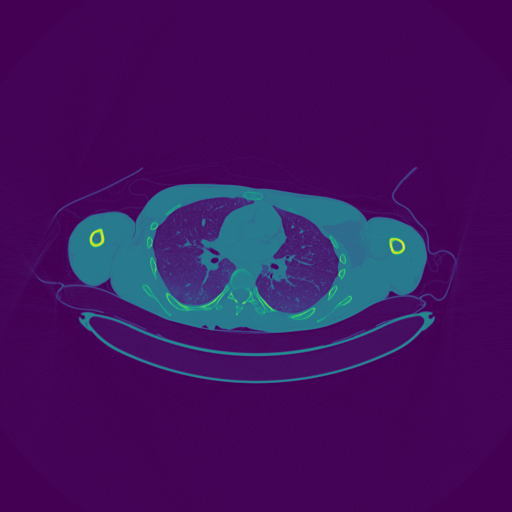

368
0.2845765771032462
0
05_19_degrees.png


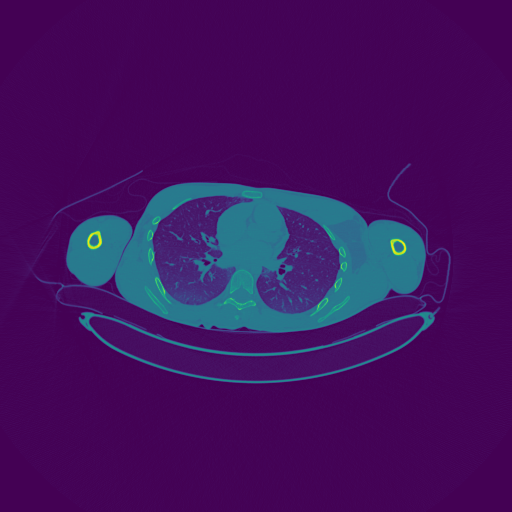

377
0.2925634882230837
0
05_71_degrees.png


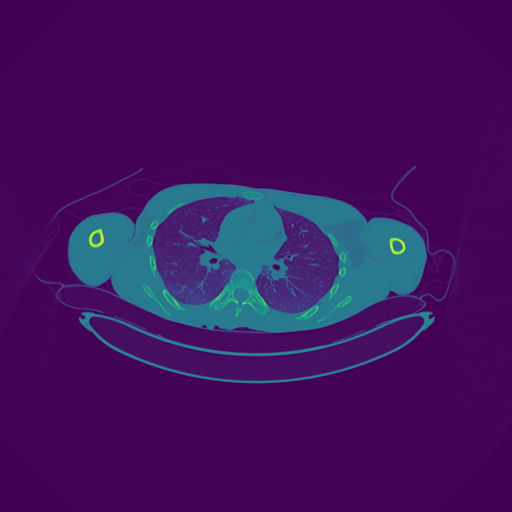

368
0.2845765771032462
0
06_34_degrees.png


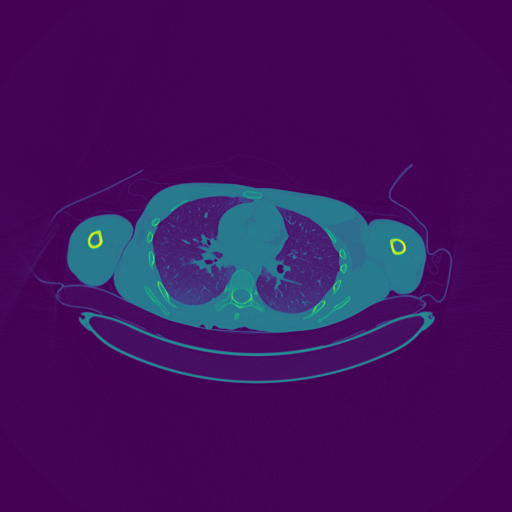

368
0.2845765771032462
0
07_13_degrees.png


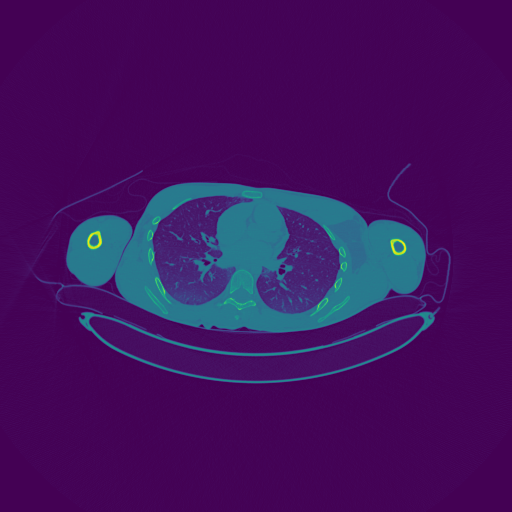

368
0.2845765771032462
0
08_1_degrees.png


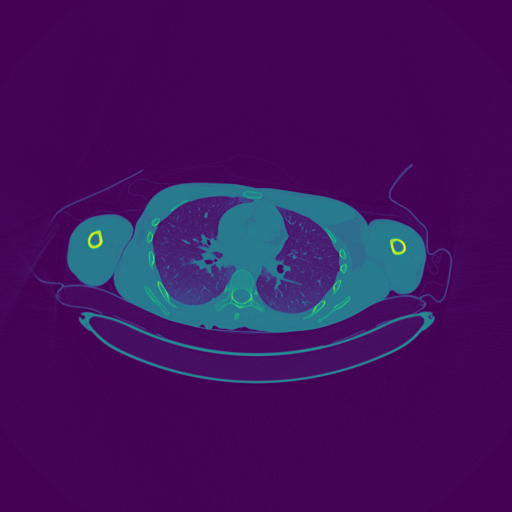

368
0.2845765771032462
0
09_46_degrees.png


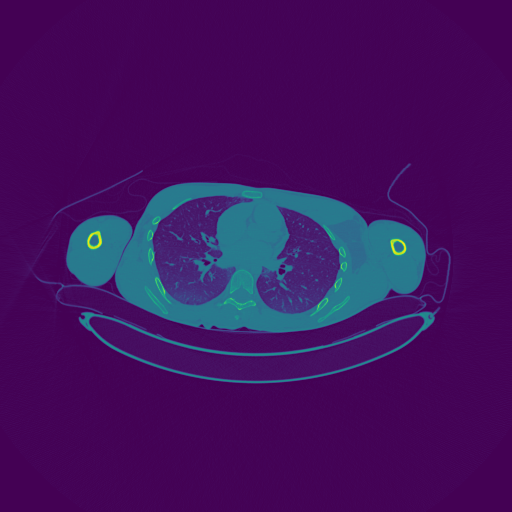

346
0.2937259016074784
0
0_degrees.png


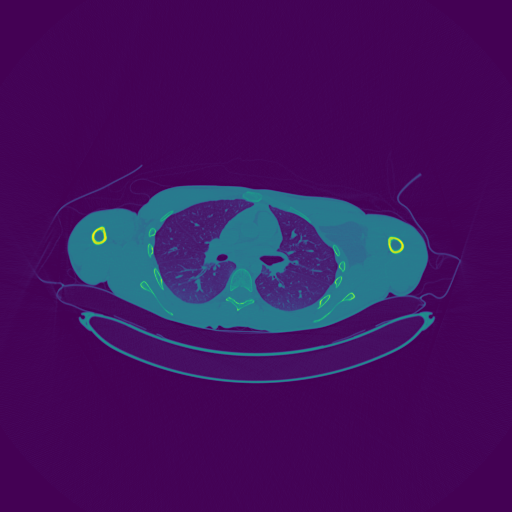

401
0.2866738943105918
0
11_37_degrees.png


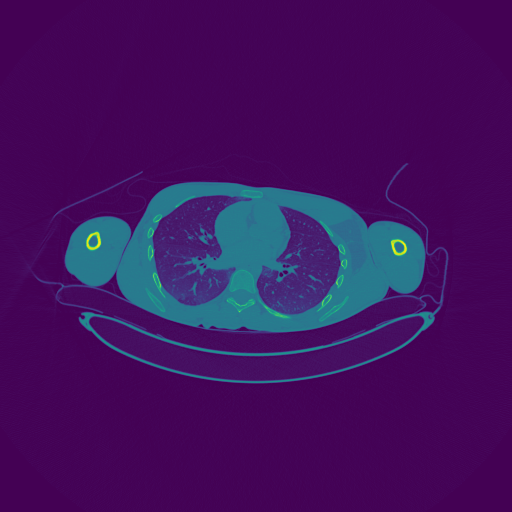

417
0.29391728569690223
0
14_03_degrees.png


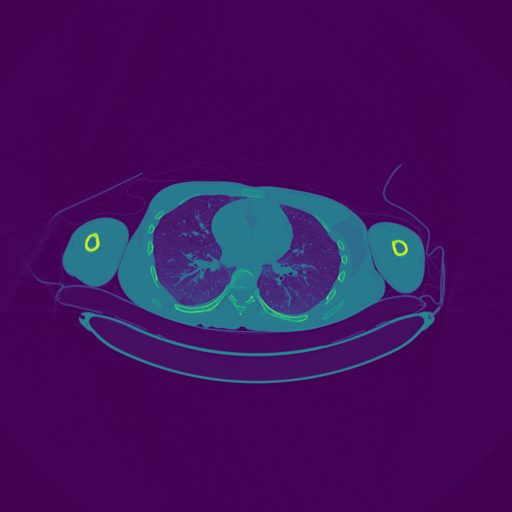

426
0.3103164454170875
0
18_43_degrees.png


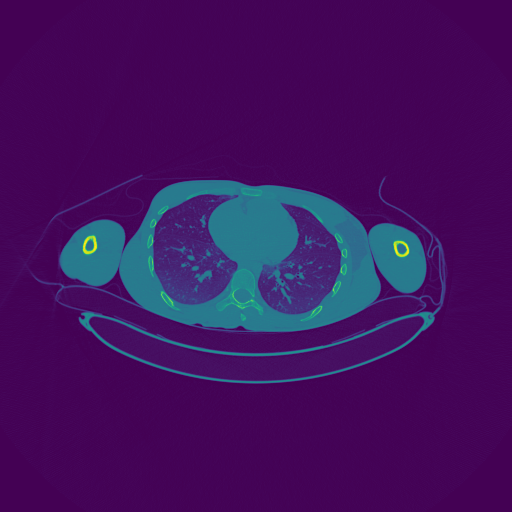

466
0.29917961619398226
0
26_57_degrees.png


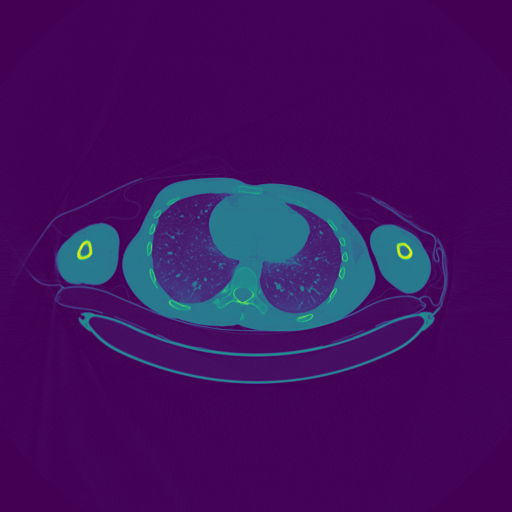

588
0.30126198109746866
0
45_degrees.png


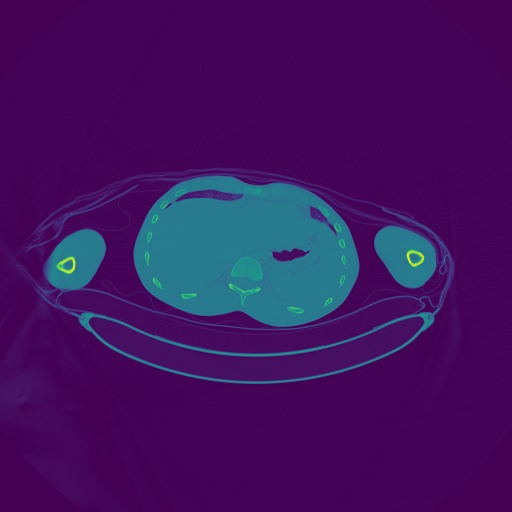

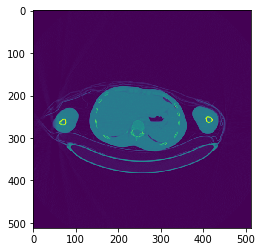

In [0]:
for img in testimg:
  inti = 0
  mlist = [] 
  direction = 0

  gis = ImageSignature()
  a = gis.generate_signature((img[0]))
  #directory = '/content/drive/My Drive/ThesisData/'

  for inum in range(0, dicom_image_file_0.pixel_array.shape[0]):
    b = gis.generate_signature(dicom_image_file_0.pixel_array[inum])
    mlist.append([gis.normalized_distance(a, b),inum,direction])
    if(gis.normalized_distance(a, b) == 0):
      print('found')
      break;


  inti = 0
  direction = 1
  for img1 in tformIm:
    b = gis.generate_signature(tformIm[inti])
    mlist.append([gis.normalized_distance(a, b),inti,direction])
    if(gis.normalized_distance(a, b) == 0):
      print('found')
    inti = inti+1


  numMatch = 100
  ind = 1
  direc = 5

  for i in mlist:
    if(i[0] < numMatch):
      numMatch = i[0]
      ind = i[1]
    direc = i[2]


  numMatch = 100
  ind = 1
  direc = 5


  for i in mlist:
    if(i[0] < numMatch):
      numMatch = i[0]
      ind = i[1]
      direc = i[2]

  print(ind)
  print(numMatch)
  if(numMatch>0.5):
    direc = 5;
  print(direc)
  print(img[1])

  plt.imshow(dicom_image_file_0.pixel_array[ind])
  cv2_imshow(img[0])

